In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point

%matplotlib inline

In [2]:
df = gpd.read_file('../data/external/tree-canopy.geojson')

In [3]:
df.columns

Index(['address', 'block_id', 'boro_ct', 'borocode', 'boroname', 'brch_light',
       'brch_other', 'brch_shoe', 'cb_num', 'cncldist', 'created_at',
       'curb_loc', 'geometry', 'guards', 'health', 'latitude', 'longitude',
       'nta', 'nta_name', 'root_grate', 'root_other', 'root_stone', 'sidewalk',
       'spc_common', 'spc_latin', 'st_assem', 'st_senate', 'state', 'status',
       'steward', 'stump_diam', 'tree_dbh', 'tree_id', 'trnk_light',
       'trnk_other', 'trunk_wire', 'user_type', 'x_sp', 'y_sp', 'zip_city',
       'zipcode'],
      dtype='object')

In [4]:
df.head()

,address,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,cb_num,cncldist,...,tree_dbh,tree_id,trnk_light,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode
0,45 DUPONT STREET,216486,3056300,3,Brooklyn,No,No,No,301,33,...,4,101233,No,No,No,Volunteer,995754.899878,207355.752989,Brooklyn,11222
1,2 CLAY STREET,216486,3056300,3,Brooklyn,No,No,No,301,33,...,4,101234,No,No,No,Volunteer,995747.63677,207412.792245,Brooklyn,11222
2,2 CLAY STREET,216486,3056300,3,Brooklyn,No,No,No,301,33,...,4,101235,No,No,No,Volunteer,995743.885137,207442.254128,Brooklyn,11222
3,237 FRANKLIN STREET,216291,3056300,3,Brooklyn,Yes,No,No,301,33,...,15,101400,No,No,No,Volunteer,995653.777377,207228.768335,Brooklyn,11222
4,237 FRANKLIN STREET,216291,3056300,3,Brooklyn,Yes,No,No,301,33,...,18,101401,No,No,No,Volunteer,995616.258095,207224.169263,Brooklyn,11222


In [5]:
# Keep only the relevant columns
df = df.loc[:, ["block_id", "tree_dbh", "status", "health", "spc_latin", 
                "spc_common", "sidewalk", "geometry", "tree_id"]]

In [6]:
# There are dead and stumped trees in the data set!
print ("Dead:", len(df[df.status == "Dead"]))
print ("Stump:", len(df[df.status == "Stump"]))

Dead: 10376
Stump: 11469


In [7]:
# Keep only trees that are alive 
df = df[df.status == "Alive"]

In [8]:
# Make sure we're using the correct projection
df = df.to_crs({'init' :'epsg:4326'})

In [9]:
df.head(3)

,block_id,tree_dbh,status,health,spc_latin,spc_common,sidewalk,geometry,tree_id
0,216486,4,Alive,Good,Quercus bicolor,Swamp White Oak,NoDamage,POINT (-73.95848582835121 40.7358127696309),101233
1,216486,4,Alive,Good,Quercus bicolor,Swamp White Oak,NoDamage,POINT (-73.95851193899931 40.73596933773587),101234
2,216486,4,Alive,Good,Quercus bicolor,Swamp White Oak,NoDamage,POINT (-73.95852542605115 40.7360502081988),101235


### Notes on Columns
[From data reference PDF](/files/references/tree-canopy.pdf)

**tree_dbh**

Diameter of the tree, measured at approximately 54" / 137cm above the ground. Data was collected for both living and dead trees; for stumps, use stump_diam

Because standard measuring tapes are more accessible than forestry-specific measuring tapes designed to measure diameter, users originally measured tree circumference in the field. To better match other forestry datasets, this circumference value was subsequently divided by 3.14159 to transform it to diameter. Both the field measurement and processed value were rounded to the nearest whole inch.

**health**

Indicates the user's perception of tree health.


In [9]:
# Make tree diameter an integer
df.tree_dbh = df.tree_dbh.astype("int64")

In [10]:
df.describe()

,tree_dbh
count,446496.000000
mean,10.782509
std,8.043712
min,0.000000
25%,4.000000
50%,9.000000
75%,15.000000
max,318.000000


In [11]:
len(df[df["tree_dbh"] < 50])

446246

In [12]:
df[df["tree_dbh"] > 100]

,block_id,tree_dbh,status,health,spc_latin,spc_common,sidewalk,geometry,tree_id
744,216298,151,Alive,Good,Platanus x acerifolia,London Planetree,NoDamage,POINT (-73.94963654163899 40.73360178269525),150206
4745,503571,132,Alive,Good,Quercus palustris,Pin Oak,Damage,POINT (-73.92214721500579 40.84101218187434),4934
12309,315586,140,Alive,Fair,Acer platanoides 'Crimson King',Crimson King Maple,NoDamage,POINT (-73.82890269636783 40.78957015294017),14414
27323,336132,149,Alive,Good,Acer platanoides,Norway Maple,NoDamage,POINT (-73.71199233472572 40.74215819426818),32503
33440,203212,170,Alive,Good,Platanus x acerifolia,London Planetree,Damage,POINT (-74.03402831453573 40.61254217713028),40115
42645,414909,131,Alive,Good,Prunus,Cherry,NoDamage,POINT (-74.14700367458741 40.56092321377076),51675
50941,219890,110,Alive,Good,Quercus phellos,Willow Oak,NoDamage,POINT (-73.98127871850185 40.70137097264522),62298
50942,219890,103,Alive,Good,Quercus phellos,Willow Oak,NoDamage,POINT (-73.98143797656377 40.70137623401526),62299
64214,340997,168,Alive,Good,Acer saccharinum,Silver Maple,Damage,POINT (-73.88477731045042 40.75195816002473),78148
94995,409043,123,Alive,Good,Pyrus calleryana,Callery Pear,Damage,POINT (-74.15677389502299 40.58118662295067),114413


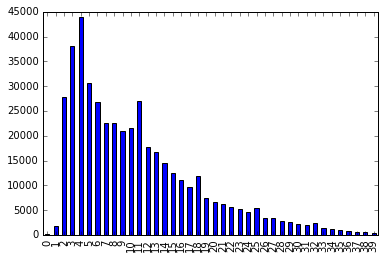

In [14]:
df[df["tree_dbh"] < 40].tree_dbh.value_counts(sort=False).plot(kind="bar")

The most common tree trunk size is 4.

### Assumptions

- Increase in number of trees is a benefit. Every new tree within the radius of the bike station should increase score.
- Any tree is valuable, even in poor condition. No negative scores.
- There is a diminishing return in increasing tree size.

What is the relative benefit of increasing size of trees? Does a tree twice as large bring twice as much value to publice space? Or do trees have a diminishing return on size?

In [13]:
tree_size_counts = df.tree_dbh.value_counts(sort=False)

In [14]:
df["size_score"] = np.sqrt(1 + df.tree_dbh)

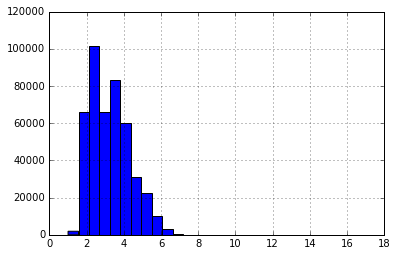

In [15]:
df.size_score.hist(bins=30)

Much better distrbution. We'll use this for the score.

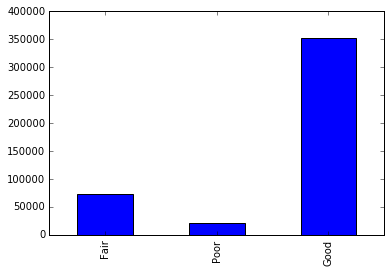

In [16]:
df.health.value_counts(sort=False).plot(kind="bar")

In [17]:
# One tree does not have health status. Remove it.
df[pd.isnull(df.health)]

,block_id,tree_dbh,status,health,spc_latin,spc_common,sidewalk,geometry,tree_id,size_score
206251,413012,16,Alive,None,Fraxinus pennsylvanica,Green Ash,Damage,POINT (-74.21641202587655 40.54859739520807),245041,4.123106


In [18]:
df = df[~pd.isnull(df.health)]

### Thoughts

Bad health should cause a penalty, good health should simply be 100%.

- Good: 100%
- Fair: 80%
- Poor: 60%

In [19]:
def define_health(x):
    if x == "Good":
        return 1.0
    elif x == "Fair":
        return 0.8
    elif x == "Poor":
        return 0.6

df["health_multiplier"] = df.health.map(define_health)

In [20]:
df["score"] = df.health_multiplier * df.size_score

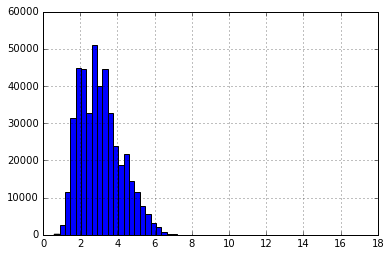

In [21]:
df.score.hist(bins=60)

In [22]:
df.describe()

,tree_dbh,size_score,health_multiplier,score
count,446495.000000,446495.000000,446495.000000,446495.000000
mean,10.782497,3.257814,0.948009,3.096809
std,8.043718,1.081271,0.107167,1.110327
min,0.000000,1.000000,0.600000,0.600000
25%,4.000000,2.236068,1.000000,2.236068
50%,9.000000,3.162278,1.000000,3.000000
75%,15.000000,4.000000,1.000000,3.741657
max,318.000000,17.860571,1.000000,17.860571


The equation for the tree score is as follow:

$$
S = h \sqrt{1 + \oslash_{tree}}
$$

$h$ being the health multiplier, from 0.6 to 1.0 depending on the health of the tree.  
$\oslash_{tree}$ being the diameter of the tree.

In [ ]:
df.to_csv('../data/interim/tree-scores.csv')

## Merge Into CSV 

In [23]:
# Merge into stations
stations = pd.read_csv('../data/processed/stations.csv')

In [24]:
# Convert stations csv into buffer polygons
geometry = gpd.GeoSeries([Point(xy) for xy in zip(stations.Longitude, stations.Latitude)])
geometry = geometry.buffer(.0005)

geo_stations = gpd.GeoDataFrame(stations, geometry=geometry)
geo_stations.crs = {'init' :'epsg:4326'}
geo_stations.head()
geo_stations.to_file('../data/interim/geo_stations')

In [25]:
# Merge street quality data with citibike stations using Geopandas Spatial Merge
station_df = gpd.sjoin(geo_stations, df, how="left", op='intersects')

0        1705.0
0      289503.0
0      289504.0
0      289596.0
0      289597.0
0      289598.0
0      323435.0
1       23453.0
1       63578.0
1      226572.0
2      230987.0
2      230988.0
2      230991.0
2      230992.0
2      230979.0
2      230980.0
2      230981.0
2      230983.0
2      230984.0
2      230985.0
2      230986.0
4       36636.0
4       36689.0
4       36637.0
4       36688.0
4       36638.0
4       36687.0
4       36686.0
4       36639.0
4       36685.0
         ...   
662     74230.0
662     74231.0
662    376605.0
662    376606.0
662    376607.0
662    376608.0
662    376609.0
662    376610.0
662    376611.0
662    376612.0
662    376613.0
662    376614.0
662    376615.0
662    376616.0
662    376617.0
662    376618.0
662    380950.0
662    380951.0
662    380952.0
662    380953.0
662    380954.0
663    159402.0
663    159401.0
663    159324.0
663    159325.0
663    167235.0
663    247214.0
663    167236.0
663    167237.0
663    247213.0
Name: index_right, dtype

In [40]:
# Save for Map
df.loc[station_df.index_right.dropna().unique(), :].to_csv("../data/map/trees.csv")

In [15]:
station_df

,Station_id,Station_Name,Location,Latitude,Longitude,geometry,index_right,block_id,tree_dbh,status,health,spc_latin,spc_common,sidewalk
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",1705.0,104056,10.0,Alive,Good,Ginkgo biloba,Ginkgo,NoDamage
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",289503.0,104038,5.0,Alive,Fair,Quercus velutina,Black Oak,NoDamage
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",289504.0,104038,5.0,Alive,Fair,Quercus velutina,Black Oak,NoDamage
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",289596.0,104051,7.0,Alive,Good,Ginkgo biloba,Ginkgo,NoDamage
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",289597.0,104051,4.0,Alive,Good,Ginkgo biloba,Ginkgo,NoDamage
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",289598.0,104051,4.0,Alive,Good,Ginkgo biloba,Ginkgo,NoDamage
0,72,W 52 St & 11 Ave,W 52 St & 11 Ave,40.767272,-73.993929,"POLYGON ((-73.99342888 40.76727216, -73.993431...",323435.0,104052,7.0,Alive,Good,Pyrus calleryana,Callery Pear,NoDamage
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74....",23453.0,100715,6.0,Alive,Good,Styphnolobium japonicum,Sophora,NoDamage
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74....",63578.0,100741,11.0,Alive,Good,Gleditsia triacanthos var. inermis,Honeylocust var. inermis,Damage
1,79,Franklin St & W Broadway,Franklin St & W Broadway,40.719116,-74.006667,"POLYGON ((-74.00616660999999 40.71911552, -74....",226572.0,100676,11.0,Alive,Good,Gleditsia triacanthos var. inermis,Honeylocust var. inermis,Damage


In [138]:
# Create new dataframe with summed score
station_scores = pd.DataFrame()

station_scores["score"] = station_df.groupby(['Station_id']).score.sum()
station_scores["score_mean"] = station_df.groupby(['Station_id']).score.mean()
station_scores["tree_count"] = station_df.groupby(['Station_id']).score.count()
station_scores["station_id"] = station_df.groupby(['Station_id']).score.mean().index

station_scores.fillna(0.0, inplace=True)

In [139]:
station_scores.head(3)

,score,score_mean,tree_count,station_id
Station_id,,,,
72,17.364799,2.480686,7,72
79,9.573955,3.191318,3,79
82,35.070325,3.188211,11,82


In [141]:
station_scores.describe()

,score,score_mean,tree_count,station_id
count,664.000000,664.000000,664.000000,664.000000
mean,30.308350,2.420123,10.346386,1938.709337
std,24.056091,1.180938,7.720449,1418.574359
min,0.000000,0.000000,0.000000,72.000000
25%,10.029243,2.165563,4.000000,397.750000
50%,27.883442,2.722640,10.000000,3063.500000
75%,44.892552,3.158382,16.000000,3259.250000
max,130.979643,5.194789,40.000000,3436.000000


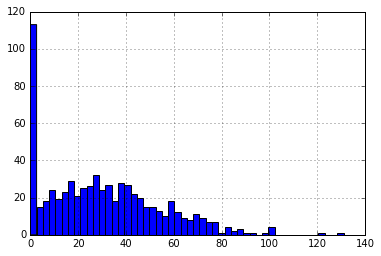

In [142]:
# Histogram of scores
station_scores.score.hist(bins=50)

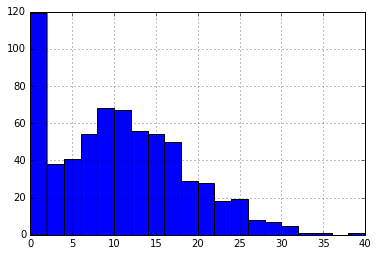

In [151]:
# Histogram of tree counts
station_scores.tree_count.hist(bins=20)

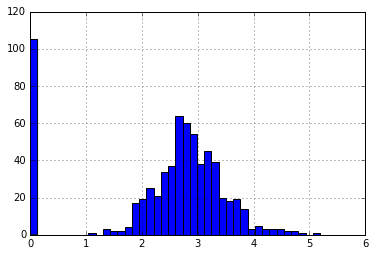

In [155]:
# Histogram of mean tree score per station
station_scores.score_mean.hist(bins=40)

In [158]:
zero_stations = len(station_scores[station_scores.score == 0])
print("Number of stations without trees:", str(zero_stations))

Number of stations without trees: 105


In [160]:
# Save to CSV
station_scores.to_csv("../data/processed/tree-canopy.csv")